# Distributed Analysis

The Arnheim Framework bridges djangos ORM with cluster based analysis. A Representation inherits from the LarvikArray which in turn is a Proxy for xArray. All of the meta data is stored in this datafile so it is easily browsable.

In [11]:
from dask.distributed import Client, progress
c = Client()
c

/opt/conda/lib/python3.7/site-packages/distributed/client.py:1074: VersionMismatchWarning: Mismatched versions found

msgpack
+------------------------+---------+
|                        | version |
+------------------------+---------+
| client                 | 0.6.1   |
| scheduler              | 0.6.2   |
| tcp://172.18.0.2:41903 | 0.6.2   |
+------------------------+---------+
  warnings.warn(version_module.VersionMismatchWarning(msg[0]["warning"]))


Client Scheduler: tcp://daskscheduler:8786 Dashboard: http://daskscheduler:8787/status,Cluster Workers: 1 Cores: 4 Memory: 4.65 GB


## Import

Representation is bergens binder of ImageStack where general x and y dimensions have not been altered to the original ImageStack, so 2D Rois are all perfectly aligned.

In [2]:
import django
django.setup()

from bioconverter.models import Representation
from filters.logic.filters import  Prewitt, Mapping
from filters.logic.projections import  MaxISP
import larvik.extenders
from larvik.helpers import LarvikManager

2020-02-12 18:56:56,155 [larvik.extenders] INFO     Making DataArrays Look Beautiful
2020-02-12 18:56:56,156 [larvik.extenders] INFO     Extending DataArray


In [3]:
rep = Representation.distributed.filter(type="initial", sample__bioseries__bioimage__locker__name__startswith="Test").last()
rep

<Representation: Initial Stack>

In [12]:
prewitt = Prewitt.filter(rep, {}).sel(c=0).max(dim="z")

## Further Filtration on the Cluster

Further Analysis is then done on the Cluster (the LarvikBag call is a Proxy to Dask Bag, with _getarr_ matching, put provides more methods like parsing and setting storage

2020-02-12 19:06:35,675 [larvik.extenders] INFO     Stack has 1 Timepoints: selecting t=0


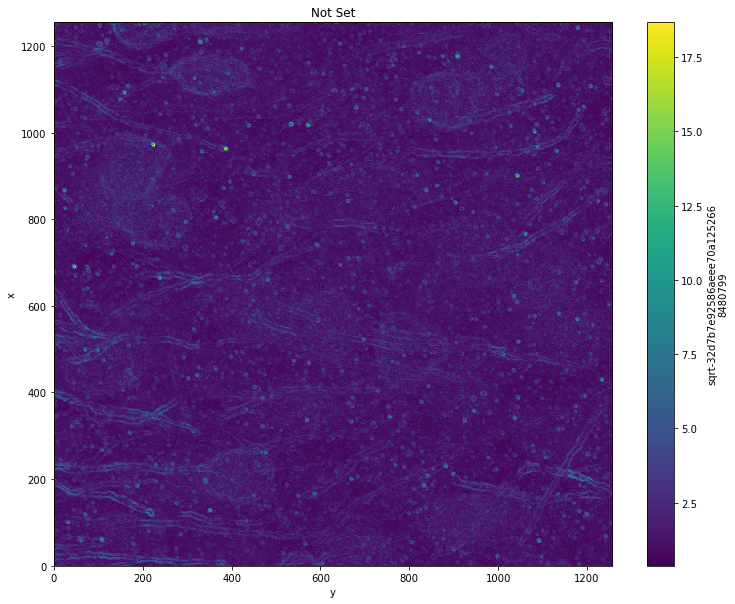

In [13]:
%matplotlib inline
prewitt.viewer.show(scale=10)

## Evaluation
As long as no computation is called the array has not yet been altered. We can call this for each array individual or for the whole stack

2020-02-12 17:49:42,347 [larvik.extenders] INFO     Stack has 5 Z Planes: Projecting maximum intensity


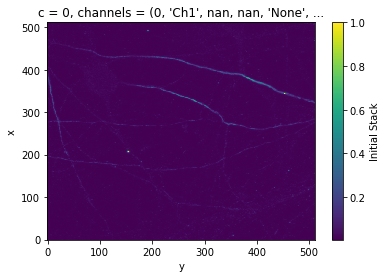

In [8]:
%matplotlib inline
rep.sel(c=0,t=0).viewer.show()